# PC6432 Project Report - Kapitza's Pendulum
## By Su Zhengchong and Jordan Kai-Wei Yeo

### Description of Kapitza's Pendulum
Kapitza's Pendulum is a bob attached to a oscillating pivot using a rigid rod. When the oscillation meets certain conditions, the bob would have 2 points of stable equilibrium, one directly above the pivot and one directly below. This project aims to investigate how the pendulum would behave under various conditions.

### Symbols used for parameters/state of system
$ \varphi $ - angle between the bob and the vertical line below the pivot
$ a $ - max amplitude of oscillation of pivot
$ l $ - length of rod between bob and pivot
$ \nu $ - angular frequency of oscillation of pivot
$ g $ - gravitation acceleration
$ \varphi_0 $ - initial phase of the bob
$ \theta_0 $ - initial phase of the pivot

### Parameters investigated
$ \nu, \varphi_0, a $

### Fixed Parameters
The pivot oscillates vertically according to an SHM, $ g = 9.81m/s^2 $, mass of pendulum does not matter as how the system evolves is independent of the mass, set to 1kg for ease of calculation. $ l = 1m, \theta_0 = 0 $

### Equations of motion using Lagragian mechanics
\begin{align*}
    x &= l \sin{\varphi} \\
    y &= -(l \cos{\varphi} + a \cos{\nu t}) \\
    E_{pot} &= mgy = -mg(l \cos{\varphi} + a \cos{\nu t}) \\
    E_{kin} &= \frac{1}{2}m\left(\left(\frac{dx}{dt}\right)^2 + \left(\frac{dy}{dt}\right)^2\right) \\
    E_{kin} &= m\left(\frac{(l\dot\varphi)^2}{2} + al\nu\sin{(\nu t)}\sin{(\varphi)}\dot\varphi + \frac{(a\nu\sin{(\nu t)})^2}{2}\right) \\
    L &= K - U = m\left(\frac{(l\dot\varphi)^2}{2} + al\nu\sin{(\nu t)}\sin{(\varphi)}\dot\varphi + \frac{(a\nu\sin{(\nu t)})^2}{2} + g(l\cos{\varphi} + a \cos{\nu t})\right) \\
    &\text{Since system is closed, L is non-time dependent} \\
    L &= m\left(\frac{(l\dot\varphi)^2}{2} + al\nu\sin{(\nu t)}\sin{(\varphi)}\dot\varphi + gl\cos{\varphi}\right) \\
    \frac{d}{dt}\frac{\partial L}{\partial \dot\varphi} &= \frac{\partial L}{\partial \varphi} \\
    \ddot\varphi &= -(g + a\nu^2\cos{\nu t})\frac{\sin{\nu}}{l} \\
    \frac{d}{dt}\dot\varphi &= -(g + a\nu^2\cos{\nu t})\frac{\sin{\nu}}{l} \\
    \dot\varphi &= \frac{d}{dt}\varphi \\
\end{align*}

### Messing around with conditions
There are animations coded in, to let them run, uncomment the line %matplotlib notebook and uncomment the corrsponding animation code, it seems that matplotlib doesn't like it when you use the backend and you are plotting multiple graphs simultaneously. Also comment all other plt.plot() for it to work.

In [1]:
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib.animation import FuncAnimation
#%matplotlib notebook

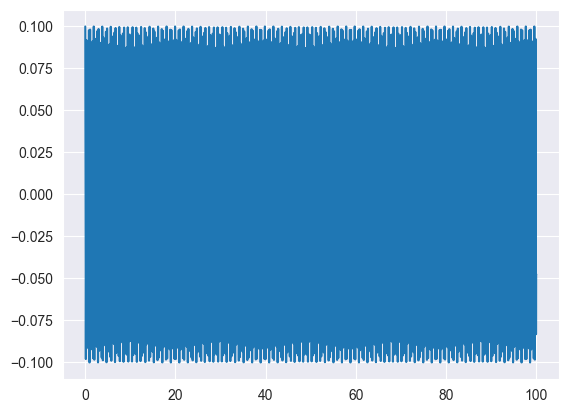

In [2]:
#simulation
g = 9.81
a = 0.3
nu = 100
l = 1

def dphidotdt(t,phi,phidot):
    return -(g+a*(nu**2)*math.cos(nu*t))*math.sin(phi)/l

def dphidt(t,phi,phidot):
    return phidot

phi0 = 0.1
phidot0 = 0
phi = phi0
phidot = phidot0

period = 100
dt = 0.0001
intervals = int(period/dt)

t_list = []
phi_list = []
phidot_list = []
energy_list = []

for i in range(intervals):
    t = i*dt
    fphi0 = dphidt(t,phi,phidot)
    fphidot0 = dphidotdt(t,phi,phidot)
    fphi1 = dphidt(t+0.5*dt,phi+0.5*dt*fphi0,phidot+0.5*dt*fphidot0)
    fphidot1 = dphidotdt(t+0.5*dt,phi+0.5*dt*fphi0,phidot+0.5*dt*fphidot0)
    fphi2= dphidt(t+0.5*dt,phi+0.5*dt*fphi1,phidot+0.5*dt*fphidot1)
    fphidot2 = dphidotdt(t+0.5*dt,phi+0.5*dt*fphi1,phidot+0.5*dt*fphidot1)
    fphi3 = dphidt(t+dt,phi+dt*fphi2,phidot+dt*fphidot2)
    fphidot3 = dphidotdt(t+dt,phi+dt*fphi2,phidot+dt*fphidot2)
    phidot = phidot + dt/6*(fphidot0+2*fphidot1+2*fphidot2+fphidot3)
    phi = phi + dt/6*(fphi0+2*fphi1+2*fphi2+fphi3)
    phidot_list.append(phidot)
    phi_list.append(phi)
    t_list.append(t + dt)
    energy_list.append((l * phidot)**2/2 + a * l * nu * math.sin(nu * (t + dt)) * math.sin(phi) * phidot + (a * nu * math.sin(nu * (t + dt)))**2 / 2 - g * (l * math.cos(phi) + a * math.cos(nu * (t + dt))))

fig = plt.figure()
plt.plot(t_list,phi_list)

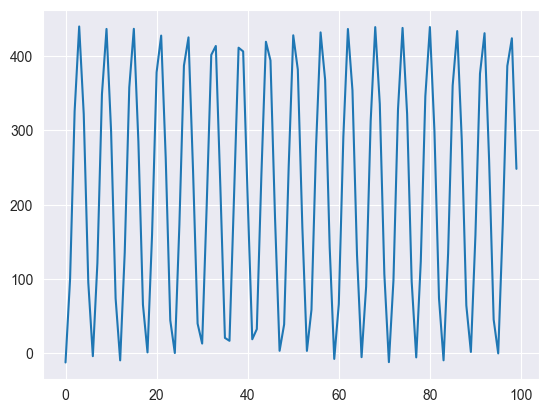

In [3]:
fig = plt.figure()
plt.plot(t_list[::10000],energy_list[::10000])

In [4]:
#calculating corresponding position of the bob
y_piv_list = []
y_bob_list = []
x_bob_list = []

for i in range(len(t_list)):
    y_piv_list.append(-a*math.cos(nu*i*dt))
    y_bob_list.append(-l*math.cos(phi_list[i])-a*math.cos(nu*i*dt))
    x_bob_list.append(l*math.sin(phi_list[i]))

In [5]:
'''fig = plt.figure()
ax = plt.axes(xlim = (-4, 4), ylim = (-4, 4))
ax.axis([-4, 4, -4, 4])
ax.set_aspect('equal', adjustable='box')

def animate(i):
    ax.clear()
    pivot_x = pivot_xs[i]
    pivot_y = pivot_ys[i]
    pivot = sns.scatterplot(x = [pivot_x], y = [pivot_y], s=[10], ax = ax, legend = False)
    bob_x = bob_xs[i]
    bob_y = bob_ys[i]
    bob = sns.scatterplot(x = [bob_x], y = [bob_y], s=[10], ax = ax, legend = False)
    rod = sns.lineplot(x = [bob_x, pivot_x], y = [bob_y, pivot_y], ax = ax, legend = False)
    ax.axis([-6, 6, -6, 6])
    return [pivot, bob, rod]

pivot_xs = ([0]*len(t_list))[::100]
pivot_ys = y_piv_list[::100]
bob_xs = x_bob_list[::100]
bob_ys = y_bob_list[::100]

ani = FuncAnimation(fig, animate, frames=len(pivot_xs), interval=10, repeat=False)
plt.show()'''#uncomment this box to show animation for the initial conditions above

"fig = plt.figure()\nax = plt.axes(xlim = (-4, 4), ylim = (-4, 4))\nax.axis([-4, 4, -4, 4])\nax.set_aspect('equal', adjustable='box')\n\ndef animate(i):\n    ax.clear()\n    pivot_x = pivot_xs[i]\n    pivot_y = pivot_ys[i]\n    pivot = sns.scatterplot(x = [pivot_x], y = [pivot_y], s=[10], ax = ax, legend = False)\n    bob_x = bob_xs[i]\n    bob_y = bob_ys[i]\n    bob = sns.scatterplot(x = [bob_x], y = [bob_y], s=[10], ax = ax, legend = False)\n    rod = sns.lineplot(x = [bob_x, pivot_x], y = [bob_y, pivot_y], ax = ax, legend = False)\n    ax.axis([-6, 6, -6, 6])\n    return [pivot, bob, rod]\n\npivot_xs = ([0]*len(t_list))[::100]\npivot_ys = y_piv_list[::100]\nbob_xs = x_bob_list[::100]\nbob_ys = y_bob_list[::100]\n\nani = FuncAnimation(fig, animate, frames=len(pivot_xs), interval=10, repeat=False)\nplt.show()"

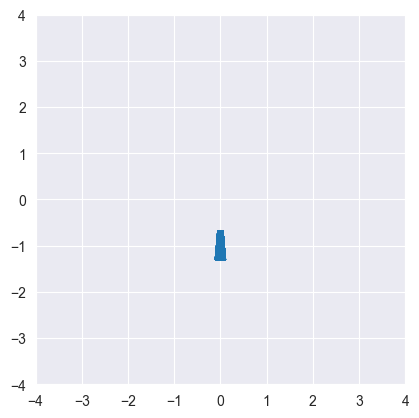

In [6]:
#trajectory of the bob
fig = plt.figure()
plt.gca().axis([-4, 4, -4, 4])
plt.gca().set_aspect('equal', adjustable = "box")
plt.plot(x_bob_list,y_bob_list)

Shown above is one of the initial conditions( where the bob oscillates around the stable equilibrium directly below the pivot.

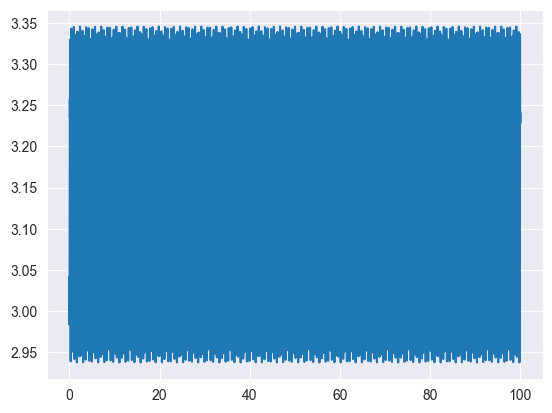

In [7]:
g = 9.81
a = 0.3
nu = 100
l = 1

def dphidotdt(t,phi,phidot):
    return -(g+a*(nu**2)*math.cos(nu*t))*math.sin(phi)/l

def dphidt(t,phi,phidot):
    return phidot

phi0 = math.pi-0.1
phidot0 = 0
phi = phi0
phidot = phidot0

period = 100
dt = 0.0001
intervals = int(period/dt)

t_list = []
phi_list = []
phidot_list = []
energy_list = []

for i in range(intervals):
    t = i*dt
    fphi0 = dphidt(t,phi,phidot)
    fphidot0 = dphidotdt(t,phi,phidot)
    fphi1 = dphidt(t+0.5*dt,phi+0.5*dt*fphi0,phidot+0.5*dt*fphidot0)
    fphidot1 = dphidotdt(t+0.5*dt,phi+0.5*dt*fphi0,phidot+0.5*dt*fphidot0)
    fphi2= dphidt(t+0.5*dt,phi+0.5*dt*fphi1,phidot+0.5*dt*fphidot1)
    fphidot2 = dphidotdt(t+0.5*dt,phi+0.5*dt*fphi1,phidot+0.5*dt*fphidot1)
    fphi3 = dphidt(t+dt,phi+dt*fphi2,phidot+dt*fphidot2)
    fphidot3 = dphidotdt(t+dt,phi+dt*fphi2,phidot+dt*fphidot2)
    phidot = phidot + dt/6*(fphidot0+2*fphidot1+2*fphidot2+fphidot3)
    phi = phi + dt/6*(fphi0+2*fphi1+2*fphi2+fphi3)
    phidot_list.append(phidot)
    phi_list.append(phi)
    t_list.append(t + dt)
    energy_list.append((l * phidot)**2/2 + a * l * nu * math.sin(nu * (t + dt)) * math.sin(phi) * phidot + (a * nu * math.sin(nu * (t + dt)))**2 / 2 - g * (l * math.cos(phi) + a * math.cos(nu * (t + dt))))

fig = plt.figure()
plt.plot(t_list,phi_list)

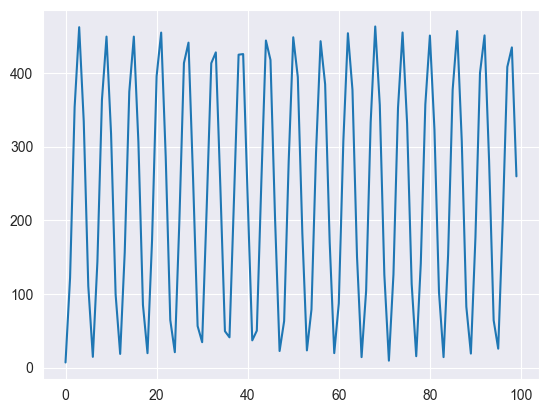

In [8]:
fig = plt.figure()
plt.plot(t_list[::10000],energy_list[::10000])

In [9]:
#calculating corresponding position of the bob
y_piv_list = []
y_bob_list = []
x_bob_list = []

for i in range(len(t_list)):
    y_piv_list.append(-a*math.cos(nu*i*dt))
    y_bob_list.append(-l*math.cos(phi_list[i])-a*math.cos(nu*i*dt))
    x_bob_list.append(l*math.sin(phi_list[i]))

In [10]:
'''fig = plt.figure()
ax = plt.axes(xlim = (-4, 4), ylim = (-4, 4))
ax.axis([-4, 4, -4, 4])
ax.set_aspect('equal', adjustable='box')

def animate(i):
    ax.clear()
    pivot_x = pivot_xs[i]
    pivot_y = pivot_ys[i]
    pivot = sns.scatterplot(x = [pivot_x], y = [pivot_y], s=[10], ax = ax, legend = False)
    bob_x = bob_xs[i]
    bob_y = bob_ys[i]
    bob = sns.scatterplot(x = [bob_x], y = [bob_y], s=[10], ax = ax, legend = False)
    rod = sns.lineplot(x = [bob_x, pivot_x], y = [bob_y, pivot_y], ax = ax, legend = False)
    ax.axis([-6, 6, -6, 6])
    return [pivot, bob, rod]

pivot_xs = ([0]*len(t_list))[::100]
pivot_ys = y_piv_list[::100]
bob_xs = x_bob_list[::100]
bob_ys = y_bob_list[::100]

ani = FuncAnimation(fig, animate, frames=len(pivot_xs), interval=10, repeat=False)
plt.show()'''#uncomment this box to show animation for the initial conditions above

"fig = plt.figure()\nax = plt.axes(xlim = (-4, 4), ylim = (-4, 4))\nax.axis([-4, 4, -4, 4])\nax.set_aspect('equal', adjustable='box')\n\ndef animate(i):\n    ax.clear()\n    pivot_x = pivot_xs[i]\n    pivot_y = pivot_ys[i]\n    pivot = sns.scatterplot(x = [pivot_x], y = [pivot_y], s=[10], ax = ax, legend = False)\n    bob_x = bob_xs[i]\n    bob_y = bob_ys[i]\n    bob = sns.scatterplot(x = [bob_x], y = [bob_y], s=[10], ax = ax, legend = False)\n    rod = sns.lineplot(x = [bob_x, pivot_x], y = [bob_y, pivot_y], ax = ax, legend = False)\n    ax.axis([-6, 6, -6, 6])\n    return [pivot, bob, rod]\n\npivot_xs = ([0]*len(t_list))[::100]\npivot_ys = y_piv_list[::100]\nbob_xs = x_bob_list[::100]\nbob_ys = y_bob_list[::100]\n\nani = FuncAnimation(fig, animate, frames=len(pivot_xs), interval=10, repeat=False)\nplt.show()"

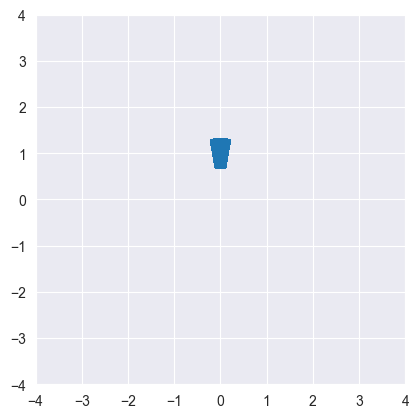

In [11]:
#trajectory of the bob
fig = plt.figure()
plt.gca().axis([-4, 4, -4, 4])
plt.gca().set_aspect('equal', adjustable = "box")
plt.plot(x_bob_list,y_bob_list)

Shown above are the same initial conditions as the previous one but the starting phase of the bob is at the top. In this case the bob oscillates around the stable equilibrium directly above the pivot. This shows that there are actually two points of stable equilibrium, one directly above the pivot and one directly below, which is very different from a normal pendulum, with only a stable equilibrium below the pivot, with the one above the pivot an unstable one.

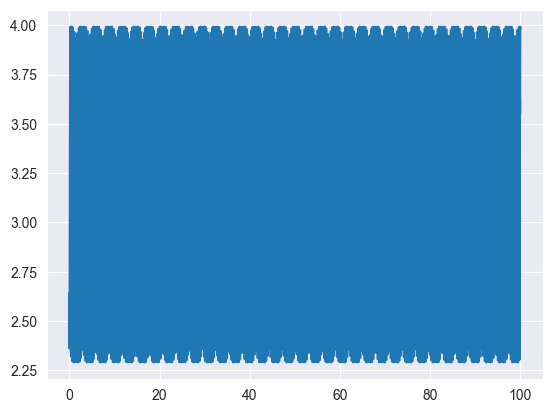

In [12]:
g = 9.81
a = 0.3
nu = 100
l = 1

def dphidotdt(t,phi,phidot):
    return -(g+a*(nu**2)*math.cos(nu*t))*math.sin(phi)/l

def dphidt(t,phi,phidot):
    return phidot

phi0 = math.pi-0.5
phidot0 = 0
phi = phi0
phidot = phidot0

period = 100
dt = 0.0001
intervals = int(period/dt)

t_list = []
phi_list = []
phidot_list = []
energy_list = []

for i in range(intervals):
    t = i*dt
    fphi0 = dphidt(t,phi,phidot)
    fphidot0 = dphidotdt(t,phi,phidot)
    fphi1 = dphidt(t+0.5*dt,phi+0.5*dt*fphi0,phidot+0.5*dt*fphidot0)
    fphidot1 = dphidotdt(t+0.5*dt,phi+0.5*dt*fphi0,phidot+0.5*dt*fphidot0)
    fphi2= dphidt(t+0.5*dt,phi+0.5*dt*fphi1,phidot+0.5*dt*fphidot1)
    fphidot2 = dphidotdt(t+0.5*dt,phi+0.5*dt*fphi1,phidot+0.5*dt*fphidot1)
    fphi3 = dphidt(t+dt,phi+dt*fphi2,phidot+dt*fphidot2)
    fphidot3 = dphidotdt(t+dt,phi+dt*fphi2,phidot+dt*fphidot2)
    phidot = phidot + dt/6*(fphidot0+2*fphidot1+2*fphidot2+fphidot3)
    phi = phi + dt/6*(fphi0+2*fphi1+2*fphi2+fphi3)
    phidot_list.append(phidot)
    phi_list.append(phi)
    t_list.append(t + dt)
    energy_list.append((l * phidot)**2/2 + a * l * nu * math.sin(nu * (t + dt)) * math.sin(phi) * phidot + (a * nu * math.sin(nu * (t + dt)))**2 / 2 - g * (l * math.cos(phi) + a * math.cos(nu * (t + dt))))

fig = plt.figure()
plt.plot(t_list,phi_list)

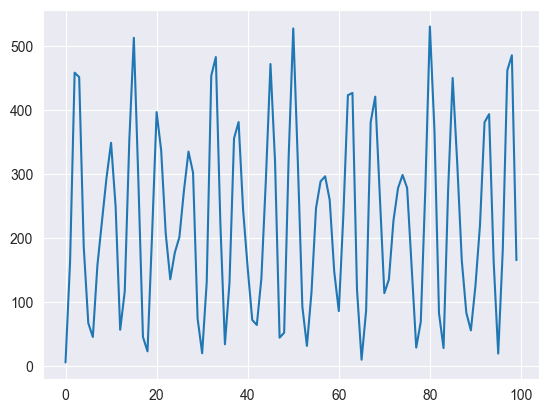

In [13]:
fig = plt.figure()
plt.plot(t_list[::10000],energy_list[::10000])

In [14]:
#calculating corresponding position of the bob
y_piv_list = []
y_bob_list = []
x_bob_list = []

for i in range(len(t_list)):
    y_piv_list.append(-a*math.cos(nu*i*dt))
    y_bob_list.append(-l*math.cos(phi_list[i])-a*math.cos(nu*i*dt))
    x_bob_list.append(l*math.sin(phi_list[i]))

In [15]:
'''fig = plt.figure()
ax = plt.axes(xlim = (-4, 4), ylim = (-4, 4))
ax.axis([-4, 4, -4, 4])
ax.set_aspect('equal', adjustable='box')

def animate(i):
    ax.clear()
    pivot_x = pivot_xs[i]
    pivot_y = pivot_ys[i]
    pivot = sns.scatterplot(x = [pivot_x], y = [pivot_y], s=[10], ax = ax, legend = False)
    bob_x = bob_xs[i]
    bob_y = bob_ys[i]
    bob = sns.scatterplot(x = [bob_x], y = [bob_y], s=[10], ax = ax, legend = False)
    rod = sns.lineplot(x = [bob_x, pivot_x], y = [bob_y, pivot_y], ax = ax, legend = False)
    ax.axis([-6, 6, -6, 6])
    return [pivot, bob, rod]

pivot_xs = ([0]*len(t_list))[::100]
pivot_ys = y_piv_list[::100]
bob_xs = x_bob_list[::100]
bob_ys = y_bob_list[::100]

ani = FuncAnimation(fig, animate, frames=len(pivot_xs), interval=10, repeat=False)
plt.show()'''#uncomment this box to show animation for the initial conditions above

"fig = plt.figure()\nax = plt.axes(xlim = (-4, 4), ylim = (-4, 4))\nax.axis([-4, 4, -4, 4])\nax.set_aspect('equal', adjustable='box')\n\ndef animate(i):\n    ax.clear()\n    pivot_x = pivot_xs[i]\n    pivot_y = pivot_ys[i]\n    pivot = sns.scatterplot(x = [pivot_x], y = [pivot_y], s=[10], ax = ax, legend = False)\n    bob_x = bob_xs[i]\n    bob_y = bob_ys[i]\n    bob = sns.scatterplot(x = [bob_x], y = [bob_y], s=[10], ax = ax, legend = False)\n    rod = sns.lineplot(x = [bob_x, pivot_x], y = [bob_y, pivot_y], ax = ax, legend = False)\n    ax.axis([-6, 6, -6, 6])\n    return [pivot, bob, rod]\n\npivot_xs = ([0]*len(t_list))[::100]\npivot_ys = y_piv_list[::100]\nbob_xs = x_bob_list[::100]\nbob_ys = y_bob_list[::100]\n\nani = FuncAnimation(fig, animate, frames=len(pivot_xs), interval=10, repeat=False)\nplt.show()"

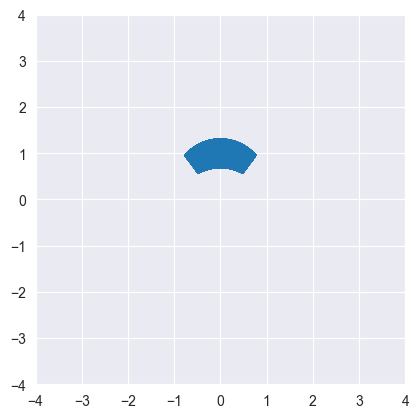

In [16]:
#trajectory of the bob
fig = plt.figure()
plt.gca().axis([-4, 4, -4, 4])
plt.gca().set_aspect('equal', adjustable = "box")
plt.plot(x_bob_list,y_bob_list)

This is the same as the previous but the bob starts at a deviation futher from the center. It seems that the starting phase decides how much it deviates from the stable equilibrium

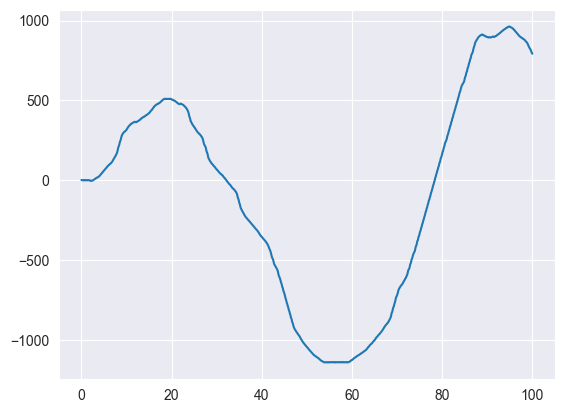

In [17]:
g = 9.81
a = 0.3
nu = 100
l = 1

def dphidotdt(t,phi,phidot):
    return -(g+a*(nu**2)*math.cos(nu*t))*math.sin(phi)/l

def dphidt(t,phi,phidot):
    return phidot

phi0 = math.pi / 2
phidot0 = 0
phi = phi0
phidot = phidot0

period = 100
dt = 0.0001
intervals = int(period/dt)

t_list = []
phi_list = []
phidot_list = []
energy_list = []

for i in range(intervals):
    t = i*dt
    fphi0 = dphidt(t,phi,phidot)
    fphidot0 = dphidotdt(t,phi,phidot)
    fphi1 = dphidt(t+0.5*dt,phi+0.5*dt*fphi0,phidot+0.5*dt*fphidot0)
    fphidot1 = dphidotdt(t+0.5*dt,phi+0.5*dt*fphi0,phidot+0.5*dt*fphidot0)
    fphi2= dphidt(t+0.5*dt,phi+0.5*dt*fphi1,phidot+0.5*dt*fphidot1)
    fphidot2 = dphidotdt(t+0.5*dt,phi+0.5*dt*fphi1,phidot+0.5*dt*fphidot1)
    fphi3 = dphidt(t+dt,phi+dt*fphi2,phidot+dt*fphidot2)
    fphidot3 = dphidotdt(t+dt,phi+dt*fphi2,phidot+dt*fphidot2)
    phidot = phidot + dt/6*(fphidot0+2*fphidot1+2*fphidot2+fphidot3)
    phi = phi + dt/6*(fphi0+2*fphi1+2*fphi2+fphi3)
    phidot_list.append(phidot)
    phi_list.append(phi)
    t_list.append(t + dt)
    energy_list.append((l * phidot)**2/2 + a * l * nu * math.sin(nu * (t + dt)) * math.sin(phi) * phidot + (a * nu * math.sin(nu * (t + dt)))**2 / 2 - g * (l * math.cos(phi) + a * math.cos(nu * (t + dt))))

fig = plt.figure()
plt.plot(t_list,phi_list)

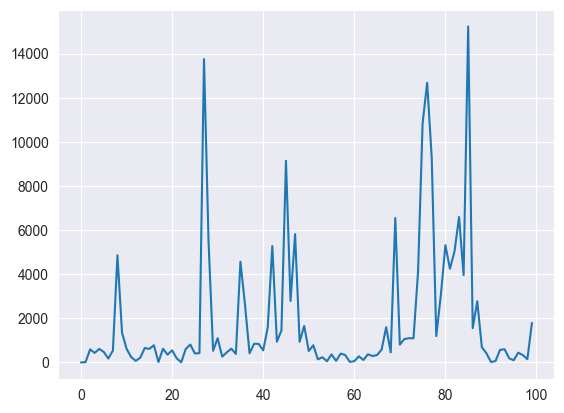

In [18]:
fig = plt.figure()
plt.plot(t_list[::10000],energy_list[::10000])

In [19]:
#calculating corresponding position of the bob
y_piv_list = []
y_bob_list = []
x_bob_list = []

for i in range(len(t_list)):
    y_piv_list.append(-a*math.cos(nu*i*dt))
    y_bob_list.append(-l*math.cos(phi_list[i])-a*math.cos(nu*i*dt))
    x_bob_list.append(l*math.sin(phi_list[i]))

In [20]:
'''fig = plt.figure()
ax = plt.axes(xlim = (-4, 4), ylim = (-4, 4))
ax.axis([-4, 4, -4, 4])
ax.set_aspect('equal', adjustable='box')

def animate(i):
    ax.clear()
    pivot_x = pivot_xs[i]
    pivot_y = pivot_ys[i]
    pivot = sns.scatterplot(x = [pivot_x], y = [pivot_y], s=[10], ax = ax, legend = False)
    bob_x = bob_xs[i]
    bob_y = bob_ys[i]
    bob = sns.scatterplot(x = [bob_x], y = [bob_y], s=[10], ax = ax, legend = False)
    rod = sns.lineplot(x = [bob_x, pivot_x], y = [bob_y, pivot_y], ax = ax, legend = False)
    ax.axis([-6, 6, -6, 6])
    return [pivot, bob, rod]

pivot_xs = ([0]*len(t_list))[::100]
pivot_ys = y_piv_list[::100]
bob_xs = x_bob_list[::100]
bob_ys = y_bob_list[::100]

ani = FuncAnimation(fig, animate, frames=len(pivot_xs), interval=10, repeat=False)
plt.show()'''#uncomment this box to show animation for the initial conditions above

"fig = plt.figure()\nax = plt.axes(xlim = (-4, 4), ylim = (-4, 4))\nax.axis([-4, 4, -4, 4])\nax.set_aspect('equal', adjustable='box')\n\ndef animate(i):\n    ax.clear()\n    pivot_x = pivot_xs[i]\n    pivot_y = pivot_ys[i]\n    pivot = sns.scatterplot(x = [pivot_x], y = [pivot_y], s=[10], ax = ax, legend = False)\n    bob_x = bob_xs[i]\n    bob_y = bob_ys[i]\n    bob = sns.scatterplot(x = [bob_x], y = [bob_y], s=[10], ax = ax, legend = False)\n    rod = sns.lineplot(x = [bob_x, pivot_x], y = [bob_y, pivot_y], ax = ax, legend = False)\n    ax.axis([-6, 6, -6, 6])\n    return [pivot, bob, rod]\n\npivot_xs = ([0]*len(t_list))[::100]\npivot_ys = y_piv_list[::100]\nbob_xs = x_bob_list[::100]\nbob_ys = y_bob_list[::100]\n\nani = FuncAnimation(fig, animate, frames=len(pivot_xs), interval=10, repeat=False)\nplt.show()"

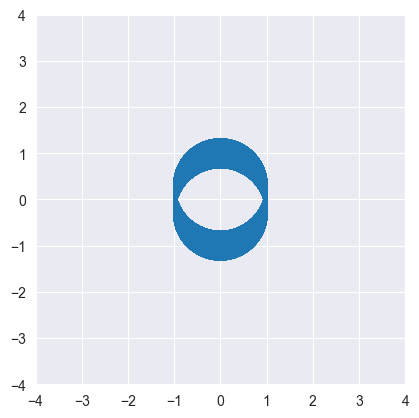

In [21]:
#trajectory of the bob
fig = plt.figure()
plt.gca().axis([-4, 4, -4, 4])
plt.gca().set_aspect('equal', adjustable = "box")
plt.plot(x_bob_list,y_bob_list)

When the bob starts off close to the center, it goes in a circle around the pivot, instead of only staying on one of the sides, it reaches both sides

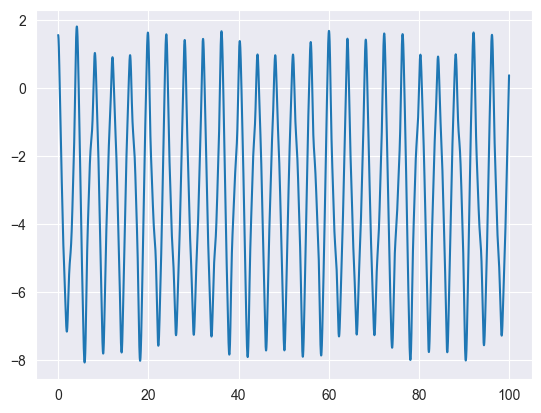

In [22]:
g = 9.81
a = 2
nu = 9.81 ** 0.5
l = 1

def dphidotdt(t,phi,phidot):
    return -(g+a*(nu**2)*math.cos(nu*t))*math.sin(phi)/l

def dphidt(t,phi,phidot):
    return phidot

phi0 = math.pi / 2
phidot0 = 0
phi = phi0
phidot = phidot0

period = 100
dt = 0.0001
intervals = int(period/dt)

t_list = []
phi_list = []
phidot_list = []
energy_list = []

for i in range(intervals):
    t = i*dt
    fphi0 = dphidt(t,phi,phidot)
    fphidot0 = dphidotdt(t,phi,phidot)
    fphi1 = dphidt(t+0.5*dt,phi+0.5*dt*fphi0,phidot+0.5*dt*fphidot0)
    fphidot1 = dphidotdt(t+0.5*dt,phi+0.5*dt*fphi0,phidot+0.5*dt*fphidot0)
    fphi2= dphidt(t+0.5*dt,phi+0.5*dt*fphi1,phidot+0.5*dt*fphidot1)
    fphidot2 = dphidotdt(t+0.5*dt,phi+0.5*dt*fphi1,phidot+0.5*dt*fphidot1)
    fphi3 = dphidt(t+dt,phi+dt*fphi2,phidot+dt*fphidot2)
    fphidot3 = dphidotdt(t+dt,phi+dt*fphi2,phidot+dt*fphidot2)
    phidot = phidot + dt/6*(fphidot0+2*fphidot1+2*fphidot2+fphidot3)
    phi = phi + dt/6*(fphi0+2*fphi1+2*fphi2+fphi3)
    phidot_list.append(phidot)
    phi_list.append(phi)
    t_list.append(t + dt)
    energy_list.append((l * phidot)**2/2 + a * l * nu * math.sin(nu * (t + dt)) * math.sin(phi) * phidot + (a * nu * math.sin(nu * (t + dt)))**2 / 2 - g * (l * math.cos(phi) + a * math.cos(nu * (t + dt))))

fig = plt.figure()
plt.plot(t_list,phi_list)

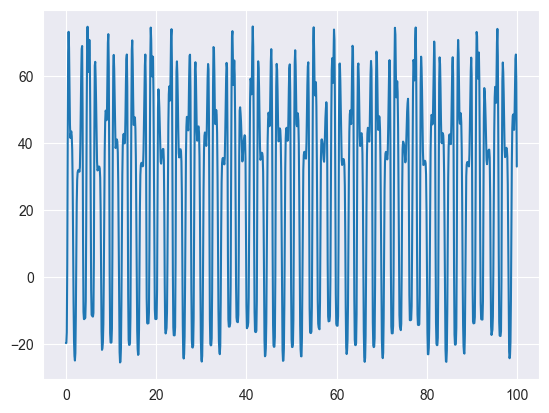

In [23]:
fig = plt.figure()
plt.plot(t_list[::1000],energy_list[::1000])

In [24]:
y_piv_list = []
y_bob_list = []
x_bob_list = []

for i in range(len(t_list)):
    y_piv_list.append(-a*math.cos(nu*i*dt))
    y_bob_list.append(-l*math.cos(phi_list[i])-a*math.cos(nu*i*dt))
    x_bob_list.append(l*math.sin(phi_list[i]))

C:\Users\olive\PycharmProjects\pythonProject\venv\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


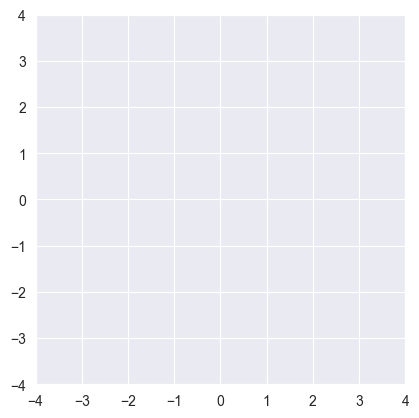

In [26]:
"""fig = plt.figure()
ax = plt.axes(xlim = (-6, 6), ylim = (-6, 6))
ax.axis([-4, 4, -4, 4])
ax.set_aspect('equal', adjustable='box')

def animate(i):
    ax.clear()
    pivot_x = pivot_xs[i]
    pivot_y = pivot_ys[i]
    pivot = sns.scatterplot(x = [pivot_x], y = [pivot_y], s=[10], ax = ax, legend = False)
    bob_x = bob_xs[i]
    bob_y = bob_ys[i]
    bob = sns.scatterplot(x = [bob_x], y = [bob_y], s=[10], ax = ax, legend = False)
    rod = sns.lineplot(x = [bob_x, pivot_x], y = [bob_y, pivot_y], ax = ax, legend = False)
    ax.axis([-6, 6, -6, 6])
    return [pivot, bob, rod]

pivot_xs = ([0]*len(t_list))[::100]
pivot_ys = y_piv_list[::100]
bob_xs = x_bob_list[::100]
bob_ys = y_bob_list[::100]

ani = FuncAnimation(fig, animate, frames=len(pivot_xs), interval=10, repeat=False)
plt.show()"""#uncomment this box to show animation for the initial conditions above

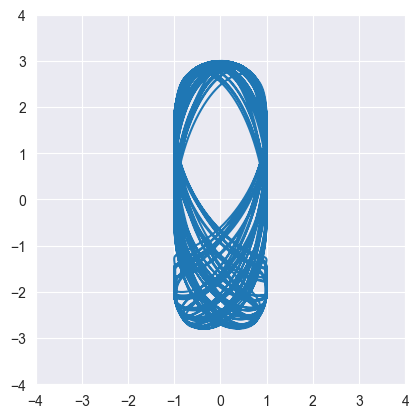

In [27]:
#trajectory of the bob
fig = plt.figure()
plt.gca().axis([-4, 4, -4, 4])
plt.gca().set_aspect('equal', adjustable = "box")
plt.plot(x_bob_list,y_bob_list)

Above shows the trajectory of the bob when amplitude is larger than the length of the rod, it becomes chaotic and draws attractor shapes. This is the closest we have gotten in an attempt to cause it to follow a nice stable rotation, instead of overlapping its trajectory.

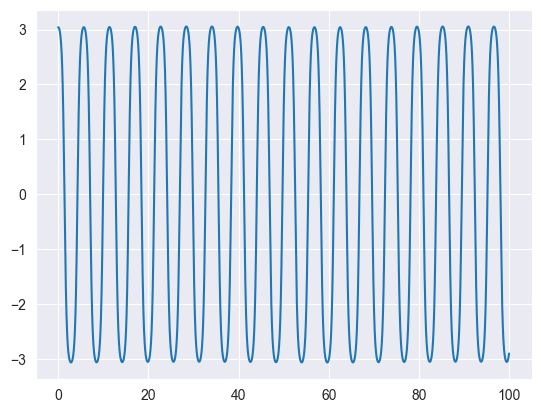

In [63]:
g = 9.81
a = 0.01
nu = 1
l = 1

def dphidotdt(t,phi,phidot):
    return -(g+a*(nu**2)*math.cos(nu*t))*math.sin(phi)/l

def dphidt(t,phi,phidot):
    return phidot

phi0 = math.pi - 0.1
phidot0 = 0
phi = phi0
phidot = phidot0

period = 100
dt = 0.0001
intervals = int(period/dt)

t_list = []
phi_list = []
phidot_list = []
energy_list = []

for i in range(intervals):
    t = i*dt
    fphi0 = dphidt(t,phi,phidot)
    fphidot0 = dphidotdt(t,phi,phidot)
    fphi1 = dphidt(t+0.5*dt,phi+0.5*dt*fphi0,phidot+0.5*dt*fphidot0)
    fphidot1 = dphidotdt(t+0.5*dt,phi+0.5*dt*fphi0,phidot+0.5*dt*fphidot0)
    fphi2= dphidt(t+0.5*dt,phi+0.5*dt*fphi1,phidot+0.5*dt*fphidot1)
    fphidot2 = dphidotdt(t+0.5*dt,phi+0.5*dt*fphi1,phidot+0.5*dt*fphidot1)
    fphi3 = dphidt(t+dt,phi+dt*fphi2,phidot+dt*fphidot2)
    fphidot3 = dphidotdt(t+dt,phi+dt*fphi2,phidot+dt*fphidot2)
    phidot = phidot + dt/6*(fphidot0+2*fphidot1+2*fphidot2+fphidot3)
    phi = phi + dt/6*(fphi0+2*fphi1+2*fphi2+fphi3)
    phidot_list.append(phidot)
    phi_list.append(phi)
    t_list.append(t + dt)
    energy_list.append((l * phidot)**2/2 + a * l * nu * math.sin(nu * (t + dt)) * math.sin(phi) * phidot + (a * nu * math.sin(nu * (t + dt)))**2 / 2 - g * (l * math.cos(phi) + a * math.cos(nu * (t + dt))))

fig = plt.figure()
plt.plot(t_list,phi_list)

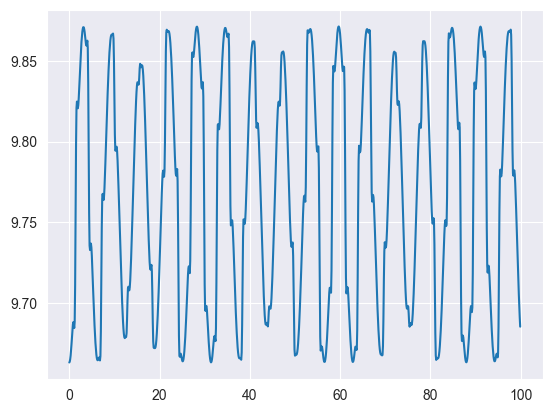

In [64]:
fig = plt.figure()
plt.plot(t_list[::1000],energy_list[::1000])

In [65]:
y_piv_list = []
y_bob_list = []
x_bob_list = []

for i in range(len(t_list)):
    y_piv_list.append(-a*math.cos(nu*i*dt))
    y_bob_list.append(-l*math.cos(phi_list[i])-a*math.cos(nu*i*dt))
    x_bob_list.append(l*math.sin(phi_list[i]))

In [66]:
"""fig = plt.figure()
ax = plt.axes(xlim = (-6, 6), ylim = (-6, 6))
ax.axis([-4, 4, -4, 4])
ax.set_aspect('equal', adjustable='box')

def animate(i):
    ax.clear()
    pivot_x = pivot_xs[i]
    pivot_y = pivot_ys[i]
    pivot = sns.scatterplot(x = [pivot_x], y = [pivot_y], s=[10], ax = ax, legend = False)
    bob_x = bob_xs[i]
    bob_y = bob_ys[i]
    bob = sns.scatterplot(x = [bob_x], y = [bob_y], s=[10], ax = ax, legend = False)
    rod = sns.lineplot(x = [bob_x, pivot_x], y = [bob_y, pivot_y], ax = ax, legend = False)
    ax.axis([-6, 6, -6, 6])
    return [pivot, bob, rod]

pivot_xs = ([0]*len(t_list))[::100]
pivot_ys = y_piv_list[::100]
bob_xs = x_bob_list[::100]
bob_ys = y_bob_list[::100]

ani = FuncAnimation(fig, animate, frames=len(pivot_xs), interval=10, repeat=False)
plt.show()"""#uncomment this box to show animation for the initial conditions above

"fig = plt.figure()\nax = plt.axes(xlim = (-6, 6), ylim = (-6, 6))\nax.axis([-4, 4, -4, 4])\nax.set_aspect('equal', adjustable='box')\n\ndef animate(i):\n    ax.clear()\n    pivot_x = pivot_xs[i]\n    pivot_y = pivot_ys[i]\n    pivot = sns.scatterplot(x = [pivot_x], y = [pivot_y], s=[10], ax = ax, legend = False)\n    bob_x = bob_xs[i]\n    bob_y = bob_ys[i]\n    bob = sns.scatterplot(x = [bob_x], y = [bob_y], s=[10], ax = ax, legend = False)\n    rod = sns.lineplot(x = [bob_x, pivot_x], y = [bob_y, pivot_y], ax = ax, legend = False)\n    ax.axis([-6, 6, -6, 6])\n    return [pivot, bob, rod]\n\npivot_xs = ([0]*len(t_list))[::100]\npivot_ys = y_piv_list[::100]\nbob_xs = x_bob_list[::100]\nbob_ys = y_bob_list[::100]\n\nani = FuncAnimation(fig, animate, frames=len(pivot_xs), interval=10, repeat=False)\nplt.show()"

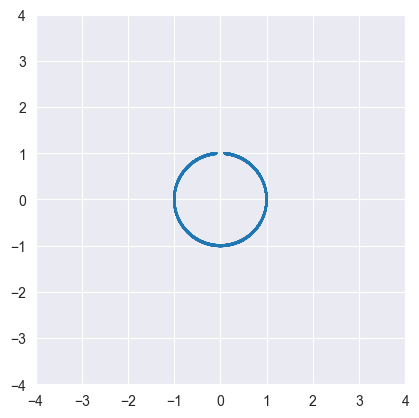

In [67]:
#trajectory of the bob
fig = plt.figure()
plt.gca().axis([-4, 4, -4, 4])
plt.gca().set_aspect('equal', adjustable = "box")
plt.plot(x_bob_list,y_bob_list)

Also, it appears that the amplitude and frequency of oscillation needs to be really low in order for the pendulum to have a trajectory similar to a normal pendulum.

### Conclusion
In conclusion, we have coded out a simulation for the kapitza's pendulum, assuming that the pivot follows an SHM. It tends to have two stable equilibrium, one right above the pivot, one right below. If the initial angle is too far from either equilibrium, the bob starts to go in a circle around the pivot. Also, the amplitude and frequency of oscillation need to be really low for the pendulum to follow a trajectory similar to a normal pendulum.

### Contribution
Equation of motion - both
Simulation - Jordan
Animation - Oliver
Playing around with values and exploring behaviour - Oliver


### References
https://en.wikipedia.org/wiki/Kapitza%27s_pendulum